<a href="https://colab.research.google.com/github/alptekinynk/Advance-Deep-Learning/blob/main/ADL_Exercise3(Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# CNN -> expanding (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)  # (28, 28) -> (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (60000, 28, 28, 1), x_test shape: (10000, 28, 28, 1)


In [3]:
# CNN Modeli
def create_cnn(input_shape=(28, 28, 1), activation_function='relu'):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10, activation='softmax') # Çıkış katmanı
    ])
    return model

In [4]:
# Train and Backward
def train_and_evaluate(model, optimizer, x_train, y_train, x_test, y_test, epochs=10):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs,
                        validation_data=(x_test, y_test), verbose=1)
    return history

In [5]:
# Ploting
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    # loss graph
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Validation graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8898 - loss: 0.3492 - val_accuracy: 0.9852 - val_loss: 0.0468
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9862 - loss: 0.0473 - val_accuracy: 0.9879 - val_loss: 0.0355
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0340 - val_accuracy: 0.9892 - val_loss: 0.0325
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9891 - val_loss: 0.0365
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9950 - loss: 0.0150 - val_accuracy: 0.9891 - val_loss: 0.0356
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9895 - val_loss: 0.0376
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9959 - loss: 0.0125

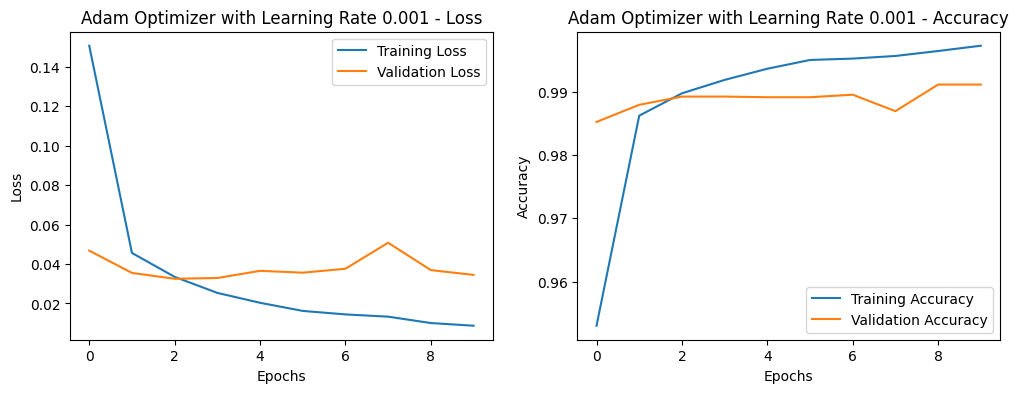

Final Training Accuracy: 0.9972
Final Validation Accuracy: 0.9911


In [6]:
# Optima
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adam optimizer

# Create model
model = create_cnn(activation_function='relu')

# train model
history = train_and_evaluate(model, optimizer, x_train, y_train, x_test, y_test, epochs=10)

# Plot result
plot_results(history, title="Adam Optimizer with Learning Rate 0.001")

# Result lass epoch
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")